In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
bank_data = pd.read_csv("./Churn_Modelling_dataset/Churn_Modelling.csv")

In [5]:
bank_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# Exploratory Data Analysis
bank_data.shape

(10000, 14)

In [9]:
# checking null values 
bank_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
# Drop the columns which are unique for all users like ID

new_bank_data = bank_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
new_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


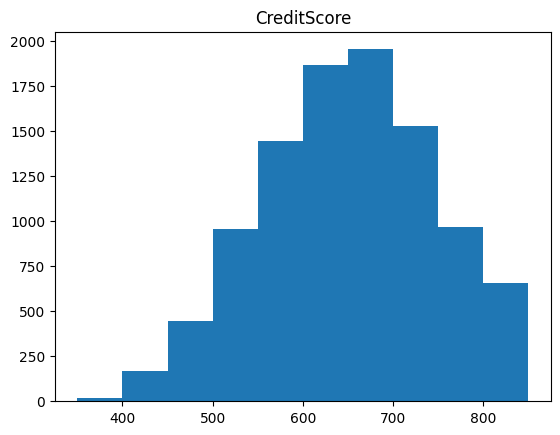

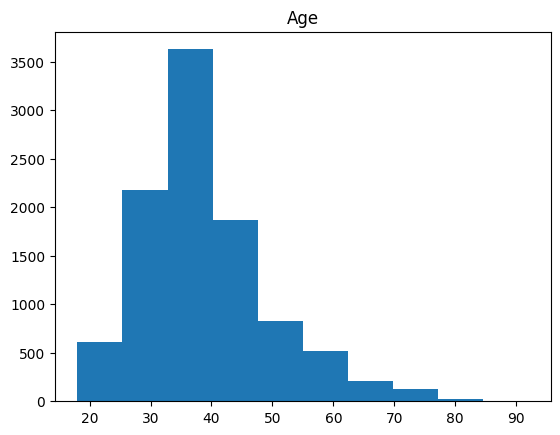

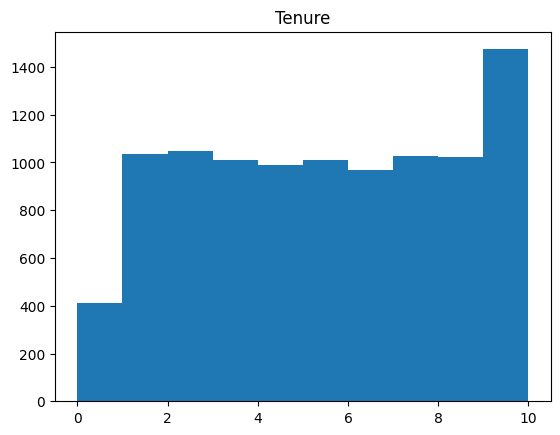

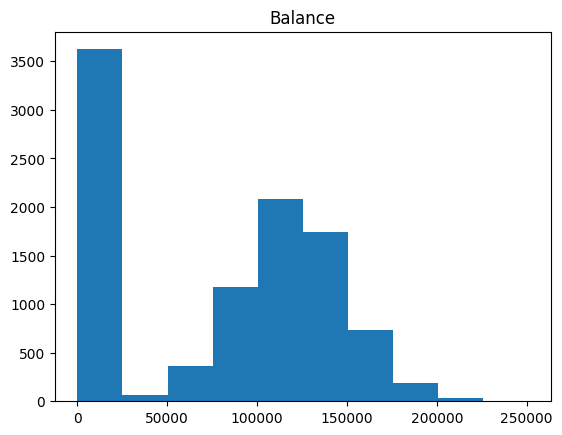

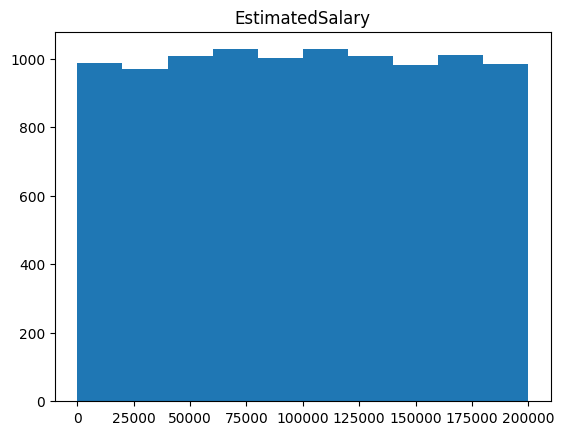

In [17]:
import matplotlib.pyplot as plt

# Distribution of Numerical Column
num_cal_dis = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
for i in num_cal_dis:
    plt.hist(bank_data[i])
    plt.title(i)
    plt.show()

In [18]:
# Model Training

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_feature_mask = new_bank_data.dtypes == object
categorical_cols = new_bank_data.columns[categorical_feature_mask].tolist()
new_bank_data[categorical_cols] = new_bank_data[categorical_cols].apply(lambda col: le.fit_transform(col))

new_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [27]:
from scipy.stats import zscore

df_scaled = new_bank_data.apply(zscore)
x_col = df_scaled.columns.tolist()[1:10]
y_col = new_bank_data.columns.tolist()[-1:]

x = df_scaled[x_col].values
y = np.array(new_bank_data['Exited'])

x, y

(array([[-0.90188624, -1.09598752,  0.29351742, ...,  0.64609167,
          0.97024255,  0.02188649],
        [ 1.51506738, -1.09598752,  0.19816383, ..., -1.54776799,
          0.97024255,  0.21653375],
        [-0.90188624, -1.09598752,  0.29351742, ...,  0.64609167,
         -1.03067011,  0.2406869 ],
        ...,
        [-0.90188624, -1.09598752, -0.27860412, ..., -1.54776799,
          0.97024255, -1.00864308],
        [ 0.30659057,  0.91241915,  0.29351742, ...,  0.64609167,
         -1.03067011, -0.12523071],
        [-0.90188624, -1.09598752, -1.04143285, ...,  0.64609167,
         -1.03067011, -1.07636976]]),
 array([1, 0, 1, ..., 1, 1, 0], dtype=int64))

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

x_train.shape, y_train.shape

((8000, 9), (8000,))

In [32]:
from tensorflow.keras.utils import to_categorical

# One Hot Encoding (Encoding output class label)
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [36]:
# Normalize data

from sklearn.preprocessing import Normalizer

normalize = Normalizer(norm = "max")
x_train = normalize.transform(x_train)

x_train

array([[-0.64894812,  0.65652702, -0.13185708, ...,  0.4648923 ,
         0.69813359,  1.        ],
       [ 0.19448537, -0.69523841,  0.00473012, ...,  0.4098475 ,
         0.61547224,  1.        ],
       [ 1.        , -0.72339193, -0.81325758, ...,  0.42644418,
         0.64039565,  0.28549496],
       ...,
       [ 0.2477419 ,  0.73728443,  0.9306362 , ...,  0.5220773 ,
         0.7840089 , -1.        ],
       [-0.60155406,  0.60857946,  0.13217438, ...,  0.43094023,
        -0.68745232, -1.        ],
       [-0.73572456,  0.74431691,  0.78394125, ...,  0.52705706,
         0.79148704, -0.71235545]])

In [37]:
x_test = normalize.transform(x_test)
x_test

array([[ 0.97887241,  0.58950641, -0.30321812, ..., -1.        ,
        -0.66590737,  0.35042786],
       [ 0.18165729, -0.6493811 , -0.33456833, ...,  0.38281432,
         0.57487623,  1.        ],
       [ 0.2797391 , -1.        , -0.34120618, ...,  0.58950641,
        -0.94040315,  0.24554834],
       ...,
       [ 0.18826936,  0.56029306,  1.        , ..., -0.95044439,
        -0.63290793, -0.47232346],
       [-0.58270119, -0.7081084 ,  0.25124632, ..., -1.        ,
         0.62686563,  0.05391691],
       [ 0.52825431,  0.31813064,  1.        , ...,  0.22527098,
         0.33829176, -0.38791965]])

In [42]:
import tensorflow as tf

# Building Machine Learning Model
model = tf.keras.Sequential()

In [44]:
from tensorflow.keras.layers import Dense

model.add(Dense(units = 6, activation = 'relu', input_shape = (9, )))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [45]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 60        
                                                                 
 dense_1 (Dense)             (None, 20)                140       
                                                                 
 dense_2 (Dense)             (None, 2)                 42        
                                                                 
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(x_train, y_train, batch_size= 45, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
178/178 [==============================] - 3s 6ms/step - loss: 0.5748 - accuracy: 0.7449 - val_loss: 0.4865 - val_accuracy: 0.7965
Epoch 2/200
178/178 [==============================] - 1s 4ms/step - loss: 0.4644 - accuracy: 0.7962 - val_loss: 0.4457 - val_accuracy: 0.7965
Epoch 3/200
178/178 [==============================] - 1s 5ms/step - loss: 0.4377 - accuracy: 0.7986 - val_loss: 0.4245 - val_accuracy: 0.8055
Epoch 4/200
178/178 [==============================] - 1s 4ms/step - loss: 0.4244 - accuracy: 0.8139 - val_loss: 0.4163 - val_accuracy: 0.8160
Epoch 5/200
178/178 [==============================] - 1s 5ms/step - loss: 0.4173 - accuracy: 0.8189 - val_loss: 0.4110 - val_accuracy: 0.8160
Epoch 6/200
178/178 [==============================] - 1s 4ms/step - loss: 0.4121 - accuracy: 0.8244 - val_loss: 0.4064 - val_accuracy: 0.8185
Epoch 7/200
178/178 [==============================] - 1s 4ms/step - loss: 0.4078 - accuracy: 0.8254 - val_loss: 0.4023 - val_accuracy: 0.8195

Epoch 58/200
178/178 [==============================] - 1s 4ms/step - loss: 0.3496 - accuracy: 0.8541 - val_loss: 0.3533 - val_accuracy: 0.8590
Epoch 59/200
178/178 [==============================] - 1s 4ms/step - loss: 0.3491 - accuracy: 0.8553 - val_loss: 0.3541 - val_accuracy: 0.8555
Epoch 60/200
178/178 [==============================] - 1s 4ms/step - loss: 0.3489 - accuracy: 0.8583 - val_loss: 0.3535 - val_accuracy: 0.8550
Epoch 61/200
178/178 [==============================] - 1s 4ms/step - loss: 0.3488 - accuracy: 0.8561 - val_loss: 0.3526 - val_accuracy: 0.8550
Epoch 62/200
178/178 [==============================] - 1s 4ms/step - loss: 0.3488 - accuracy: 0.8544 - val_loss: 0.3527 - val_accuracy: 0.8560
Epoch 63/200
178/178 [==============================] - 1s 4ms/step - loss: 0.3483 - accuracy: 0.8569 - val_loss: 0.3529 - val_accuracy: 0.8555
Epoch 64/200
178/178 [==============================] - 1s 4ms/step - loss: 0.3477 - accuracy: 0.8560 - val_loss: 0.3526 - val_accuracy:

Epoch 115/200
178/178 [==============================] - 1s 4ms/step - loss: 0.3380 - accuracy: 0.8651 - val_loss: 0.3499 - val_accuracy: 0.8575
Epoch 116/200
178/178 [==============================] - 1s 4ms/step - loss: 0.3376 - accuracy: 0.8637 - val_loss: 0.3501 - val_accuracy: 0.8585
Epoch 117/200
178/178 [==============================] - 1s 4ms/step - loss: 0.3379 - accuracy: 0.8641 - val_loss: 0.3514 - val_accuracy: 0.8610
Epoch 118/200
178/178 [==============================] - 1s 4ms/step - loss: 0.3379 - accuracy: 0.8629 - val_loss: 0.3495 - val_accuracy: 0.8615
Epoch 119/200
178/178 [==============================] - 1s 4ms/step - loss: 0.3375 - accuracy: 0.8636 - val_loss: 0.3488 - val_accuracy: 0.8615
Epoch 120/200
178/178 [==============================] - 1s 4ms/step - loss: 0.3376 - accuracy: 0.8646 - val_loss: 0.3486 - val_accuracy: 0.8610
Epoch 121/200
178/178 [==============================] - 1s 4ms/step - loss: 0.3378 - accuracy: 0.8627 - val_loss: 0.3493 - val_ac

178/178 [==============================] - 1s 4ms/step - loss: 0.3343 - accuracy: 0.8631 - val_loss: 0.3480 - val_accuracy: 0.8595
Epoch 172/200
178/178 [==============================] - 1s 4ms/step - loss: 0.3345 - accuracy: 0.8641 - val_loss: 0.3484 - val_accuracy: 0.8570
Epoch 173/200
178/178 [==============================] - 1s 4ms/step - loss: 0.3347 - accuracy: 0.8634 - val_loss: 0.3490 - val_accuracy: 0.8570
Epoch 174/200
178/178 [==============================] - 1s 4ms/step - loss: 0.3348 - accuracy: 0.8650 - val_loss: 0.3478 - val_accuracy: 0.8555
Epoch 175/200
178/178 [==============================] - 1s 4ms/step - loss: 0.3341 - accuracy: 0.8644 - val_loss: 0.3490 - val_accuracy: 0.8560
Epoch 176/200
178/178 [==============================] - 1s 4ms/step - loss: 0.3347 - accuracy: 0.8630 - val_loss: 0.3485 - val_accuracy: 0.8570
Epoch 177/200
178/178 [==============================] - 1s 4ms/step - loss: 0.3347 - accuracy: 0.8641 - val_loss: 0.3466 - val_accuracy: 0.8590

In [47]:
# Checking Train & Test Accuracy

test_score = model.evaluate(x_test, y_test, verbose=1)

train_score = model.evaluate(x_train, y_train, verbose=1)

test_score, train_score



250/250 [==============================] - 1s 3ms/step - loss: 0.3316 - accuracy: 0.8651


([0.3486514985561371, 0.8569999933242798],
 [0.3316025137901306, 0.8651250004768372])

In [50]:
y_pred = model.predict(x_test)


63/63 [==============================] - 0s 3ms/step


In [53]:
y_pred = (y_pred > 0.5)

In [54]:
# Testing the Neural Network

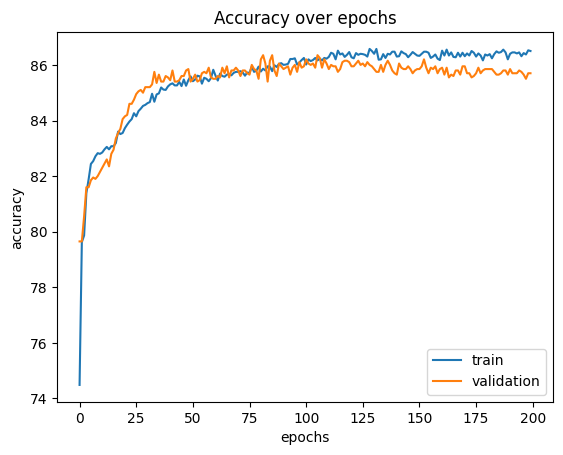

In [55]:
plt.plot(np.array(history.history['accuracy']) * 100) # 100%

plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [56]:
# Model Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.857

In [ ]:
# Model Accuracy is : 86%

In [ ]:
# Thanks for Watching